In [2]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd
from sklearn.metrics import roc_curve
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Figure 2A: Simulation signal to noise

In [9]:
# GCAM data
gcfile_exp = "/storage/pandaman/project/AgentBind-Simulation/results/gcam/c/simulated-TAL1/sn_ratio_list.txt"
gcam_sn_exp = [float(item) for item in open(gcfile_exp, "r").readlines()]
gcfile_ctrl = "/storage/pandaman/project/AgentBind-Simulation/results/gcam/c/simulated-TAL1/sn_ratio_control_list.txt"
gcam_sn_ctrl = [float(item) for item in open(gcfile_ctrl, "r").readlines()]

# SMAP
smfile_exp = "/storage/pandaman/project/AgentBind-Simulation/results/reg/c/simulated-TAL1/sn_ratio_list.txt"
sm_sn_exp = [float(item) for item in open(smfile_exp, "r").readlines()]
smfile_ctrl = "/storage/pandaman/project/AgentBind-Simulation/results/reg/c/simulated-TAL1/sn_ratio_control_list.txt"
sm_sn_ctrl = [float(item) for item in open(smfile_ctrl, "r").readlines()]

# MUT
mutfile_exp = "/storage/pandaman/project/AgentBind-Simulation/results/prtb/c/simulated-TAL1/sn_ratio_list.txt"
mut_sn_exp = [float(item) for item in open(mutfile_exp, "r").readlines()]
mutfile_ctrl = "/storage/pandaman/project/AgentBind-Simulation/results/prtb/c/simulated-TAL1/sn_ratio_control_list.txt"
mut_sn_ctrl = [float(item) for item in open(mutfile_ctrl, "r").readlines()]

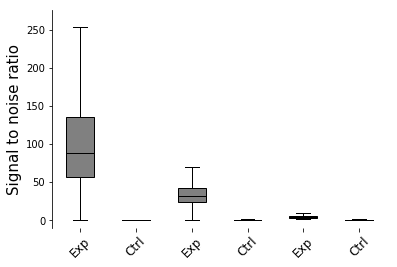

In [66]:
sndata = [gcam_sn_exp, gcam_sn_ctrl, sm_sn_exp, sm_sn_ctrl, mut_sn_exp, mut_sn_ctrl]
xticklabels = ["Exp","Ctrl"]*3
fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot(sndata, sym="", patch_artist=True, medianprops={"color": "black"});

# fill with colors
colors = ["gray"]*6 #["darkgreen","darkgreen","darkblue","darkblue","purple","purple"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylim(bottom=-10, top=275)
ax.set_ylabel("Signal to noise ratio", size=15);
ax.set_xticklabels(xticklabels, size=12, rotation=45);
fig.savefig("sim_eval_methods.pdf")

# Figure 2B: Example simulation

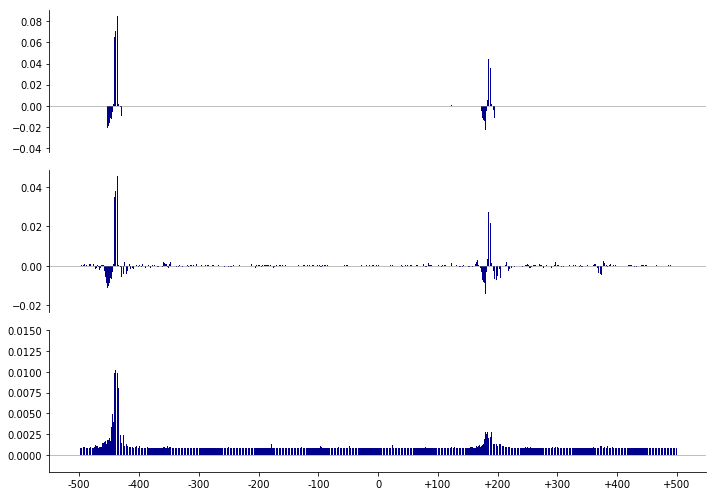

In [9]:
exnum = 718
gcfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results/gcam/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
gcam = [float(item.strip().split()[1]) for item in open(gcfile_ex, "r").readlines()]

smfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results/reg/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
sm = [float(item.strip().split()[1]) for item in open(smfile_ex, "r").readlines()]

mutfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results/prtb/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
mut = [float(item.strip().split()[1]) for item in open(mutfile_ex, "r").readlines()]

sval = 1
color = "darkblue"

xvals = range(len(gcam))
fig = plt.figure()
fig.set_size_inches((10,7))
ax = fig.add_subplot(311)
ax.bar(xvals, gcam, color=color)
ax.set_xticks([])
#ax.set_yticks(np.arange(-0.05, 0.11, 0.05))
ax.axhline(y=0, color="gray", linewidth=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(312)
ax.bar(xvals, sm, color=color)
ax.axhline(y=0, color="gray", linewidth=0.5)
ax.set_xticks([])
#ax.set_yticks(np.arange(-0.05, 0.06, 0.05))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(313)
ax.bar(xvals, mut, color=color)
#ax.set_yticks(np.arange(0, 0.021, 0.01))
ax.set_xticks(np.arange(0, 1001, 100))
ax.set_xticklabels(list(np.arange(-500, 1, 100)) + ["+%s"%item for item in np.arange(100, 501, 100)])
ax.axhline(y=0, color="gray", linewidth=0.5)
ax.set_ylim(bottom=-0.002, top=0.015)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()
fig.savefig("sim_eval_example_%s.pdf"%exnum)

In [10]:
pwd

u'/home/mgymrek/workspace/agent-bind-analyses/Figures'

# Figure 2C: Example context score locus

In [ ]:
exnum = 20 #1 #20
ex_danq_f = "/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans/storage/AgentBind-GM12878-DanQ/results/c/SP1+GM12878/weight_figures/vis-sample-%s.txt"%exnum
ex_ds_f = "/storage/pandaman/project/AgentBind-GM12878-DeepSEA-unfixed/storage/AgentBind-GM12878-DeepSEA/results/c/SP1+GM12878/weight_figures/vis-sample-%s.txt"%exnum

danq = [float(item.strip().split()[1]) for item in open(ex_danq_f, "r").readlines()[1:]]
ds = [float(item.strip().split()[1]) for item in open(ex_ds_f, "r").readlines()[1:]]

sval = 1
color = "darkblue"

xvals = range(len(danq))

fig = plt.figure()
fig.set_size_inches((6,3))
ax = fig.add_subplot(111)
ax.bar(xvals, [(item) for item in danq],  color=color);
ax.set_xticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axhline(y=0, color="gray", linewidth=0.5)
ax.set_xticklabels(list(np.arange(-500, 1, 100)) + ["+%s"%item for item in np.arange(100, 501, 100)])

#ax = fig.add_subplot(212)
#ax.bar(xvals, [(item) for item in ds], color=color);
#ax.set_xticks(np.arange(0, 1001, 100))
ax.set_xticklabels(list(np.arange(-500, 1, 100)) + ["+%s"%item for item in np.arange(100, 501, 100)])
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.axhline(y=0, color="gray", linewidth=0.5)

fig.tight_layout()
fig.savefig("real_eval_example_%s.pdf"%exnum)

# Export IGV score file # chr1:12289432-12290432
#startpos = 12289432
#f = open("scores.bedgraph", "w")
#f.write("track type=bedGraph name=locusExample\n")
#for i in range(startpos, startpos+1000):
#    f.write("chr1\t%s\t%s\t%s\n"%(i, i+1, danq[i-startpos]))
#f.close()

# Figure 2D: Aggregate context scores

/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans/storage/AgentBind-GM12878-DanQ/results/c/SP1+GM12878/weight_figures/vis-sample-total.txt
Figure 4-2:
/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans/storage/AgentBind-GM12878-DanQ/results/c/ELF1+GM12878/weight_figures/vis-sample-total.txt
Figure 4-3:
/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans/storage/AgentBind-GM12878-DanQ/results/c/CTCF+GM12878/weight_figures/vis-sample-total.txt

